In [77]:
import numpy as np
import pandas as pd 
import os 
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None 

In [58]:
os.chdir('C:/Users/rodri/Desktop/NCFS2/DistComp/proj2')

In [59]:
csv_file = "./uber_2015_processed.csv"
df2015= pd.read_csv(csv_file,sep=',')

In [60]:
df2015.head()

,datetime,lat,lon,base,locationID,borough,zone
0,2015-01-01 00:00:05,40.7188,-73.9574,B02764,255,Brooklyn,Williamsburg (North Side)
1,2015-01-01 00:00:05,40.7209,-73.9969,B02598,144,Manhattan,Little Italy/NoLiTa
2,2015-01-01 00:00:08,40.7326,-73.9943,B02682,113,Manhattan,Greenwich Village North
3,2015-01-01 00:00:11,40.7403,-73.9905,B02617,234,Manhattan,Union Sq
4,2015-01-01 00:00:13,40.7147,-73.9830,B02764,232,Manhattan,Two Bridges/Seward Park


creating date column

In [61]:
df2015['date']=pd.to_datetime(df2015['datetime']).dt.date


In [62]:
csv_file = "./US Bank holidays"
hdays = pd.read_csv(csv_file,sep=',')

In [63]:
hdays = hdays.drop(['id'],axis=1)

Getting holidays for 2014 and 2015 will change in final version

In [64]:
hdays_2014 = hdays[(hdays['date'] >= '2014-01-01') & (hdays['date'] <= '2014-12-31')]
hdays_2015 = hdays[(hdays['date'] >= '2015-01-01') & (hdays['date'] <= '2015-12-31')]

In [65]:
hdays_2015['date'] = hdays_2015['date'].astype(str).str.strip()

In [66]:
df2015['date'] = df2015['date'].astype(str).str.strip()

In [90]:
df2015["count"] = 1

In [67]:
df2015hdays = df2015.merge(hdays_2015,left_on='date',right_on='date',how='left')
df2015hdays.head()

In [97]:
df2015["datetime"] = pd.to_datetime(df2015["datetime"])

In [69]:
df2015hdays = df2015hdays.drop(['date'],axis=1)

In [70]:
df2015hdays = df2015hdays.dropna()

In [79]:
df2015hdays["datetime"] = pd.to_datetime(df2015hdays["datetime"])
df2015hdays.head()

,datetime,lat,lon,base,locationID,borough,zone,holiday,count
0,2015-01-01 00:00:05,40.7188,-73.9574,B02764,255,Brooklyn,Williamsburg (North Side),New Year Day,1
1,2015-01-01 00:00:05,40.7209,-73.9969,B02598,144,Manhattan,Little Italy/NoLiTa,New Year Day,1
2,2015-01-01 00:00:08,40.7326,-73.9943,B02682,113,Manhattan,Greenwich Village North,New Year Day,1
3,2015-01-01 00:00:11,40.7403,-73.9905,B02617,234,Manhattan,Union Sq,New Year Day,1
4,2015-01-01 00:00:13,40.7147,-73.9830,B02764,232,Manhattan,Two Bridges/Seward Park,New Year Day,1


Looking at New Year's Day traveling working off of Melanie's time series plots

In [82]:
newyear = df2015hdays[df2015hdays['holiday']=='New Year Day']
newyear.head()

,datetime,lat,lon,base,locationID,borough,zone,holiday,count
0,2015-01-01 00:00:05,40.7188,-73.9574,B02764,255,Brooklyn,Williamsburg (North Side),New Year Day,1
1,2015-01-01 00:00:05,40.7209,-73.9969,B02598,144,Manhattan,Little Italy/NoLiTa,New Year Day,1
2,2015-01-01 00:00:08,40.7326,-73.9943,B02682,113,Manhattan,Greenwich Village North,New Year Day,1
3,2015-01-01 00:00:11,40.7403,-73.9905,B02617,234,Manhattan,Union Sq,New Year Day,1
4,2015-01-01 00:00:13,40.7147,-73.9830,B02764,232,Manhattan,Two Bridges/Seward Park,New Year Day,1


In [83]:
total_per_hour = newyear[["datetime", "count"]].groupby([newyear["datetime"].dt.hour]).sum()
total_per_hour.head()

,count
datetime,
0,6166
1,5742
2,6841
3,5619
4,3375


In [84]:
average_per_hour = total_per_hour
average_per_hour["count"] = average_per_hour["count"] / 31

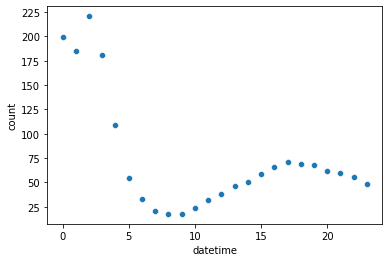

In [85]:
sns.scatterplot(data=average_per_hour, x = "datetime", y = "count")
plt.show()

Looking at 1/2/15

In [120]:
dayafterNY = df2015[(df2015['date'] >= '2015-01-02') & (df2015['date'] < '2015-01-03')]

In [121]:
dayafterNY.head()

,datetime,lat,lon,base,locationID,borough,zone,date,count
58049,2015-01-02 00:00:04,40.7744,-73.8736,B02764,138,Queens,LaGuardia Airport,2015-01-02,1
58050,2015-01-02 00:00:04,40.7009,-73.9712,B02617,34,Brooklyn,Brooklyn Navy Yard,2015-01-02,1
58051,2015-01-02 00:00:07,40.7120,-74.0161,B02682,13,Manhattan,Battery Park City,2015-01-02,1
58052,2015-01-02 00:00:07,40.7189,-73.9909,B02617,148,Manhattan,Lower East Side,2015-01-02,1
58053,2015-01-02 00:00:08,40.7744,-73.8736,B02617,138,Queens,LaGuardia Airport,2015-01-02,1


<AxesSubplot:xlabel='datetime', ylabel='count'>

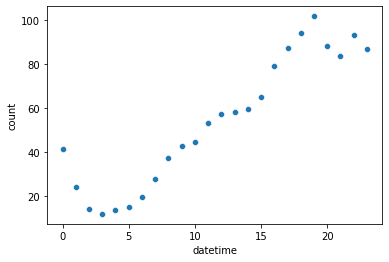

In [124]:
total_per_hour = dayafterNY[["datetime", "count"]].groupby([dayafterNY["datetime"].dt.hour]).sum()
average_per_hour = total_per_hour
average_per_hour["count"] = average_per_hour["count"] / 31
sns.scatterplot(data=average_per_hour, x = "datetime", y = "count")

confirming with two days after

In [127]:
twodayafterNY = df2015[(df2015['date'] >= '2015-01-03') & (df2015['date'] < '2015-01-04')]

<AxesSubplot:xlabel='datetime', ylabel='count'>

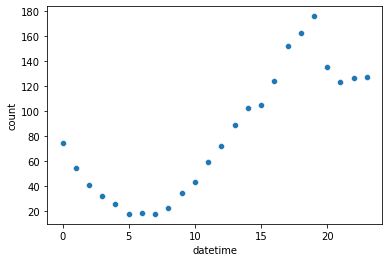

In [128]:
total_per_hour = twodayafterNY[["datetime", "count"]].groupby([twodayafterNY["datetime"].dt.hour]).sum()
average_per_hour = total_per_hour
average_per_hour["count"] = average_per_hour["count"] / 31
sns.scatterplot(data=average_per_hour, x = "datetime", y = "count")

Going to add Days before also so we get a range. This is just a tester.